In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
random_seed = 42

In [2]:
diabetes_df = pd.read_csv(os.path.join('datasets', 'pima-indians-diabetes', 'diabetes.csv'))
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: >

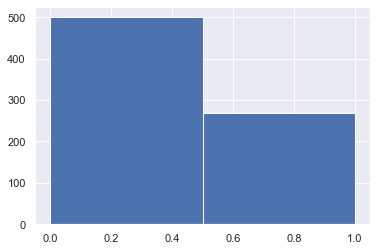

In [3]:
diabetes_df['Outcome'].hist(bins=2)

In [4]:
X, Y = diabetes_df.drop('Outcome', axis=1), diabetes_df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=random_seed, stratify=Y)

<AxesSubplot: >

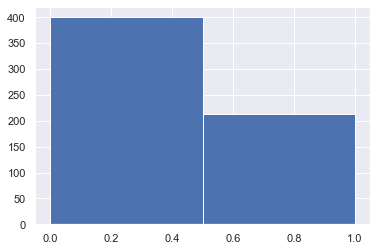

In [5]:
Y_train.hist(bins=2)  # так как сделали стратифицированную выборку

In [6]:
rfc = RandomForestClassifier(random_state=random_seed, n_estimators=100)
rfc_model = rfc.fit(X_train, Y_train)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

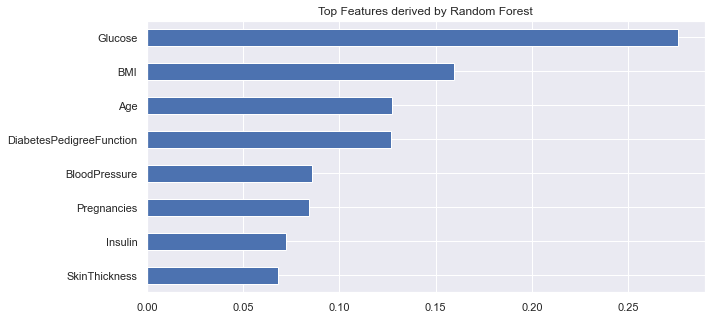

In [7]:
feature_importances = pd.Series(rfc_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.nlargest(8)
fig = feature_importances.plot(kind='barh',figsize=(10,5))
fig.invert_yaxis()
plt.title('Top Features derived by Random Forest')

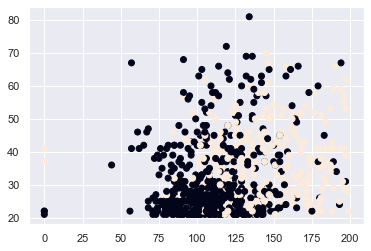

In [8]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Age'], c=diabetes_df['Outcome'])